In [329]:
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("clean_steam_data.csv",dtype={'Name': 'str'}, low_memory=False)


In [330]:
sample_size = 75  
scaler = StandardScaler()

data_sample  = data.sample(n=sample_size, random_state=35)  
names = data_sample['Name'].tolist()
data_sample.drop("Name", axis=1, inplace=True)
# columns = data_sample.columns
# data_sample = pd.DataFrame( scaler.fit_transform(data_sample), columns=columns)

C:\Users\liamc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\liamc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\liamc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

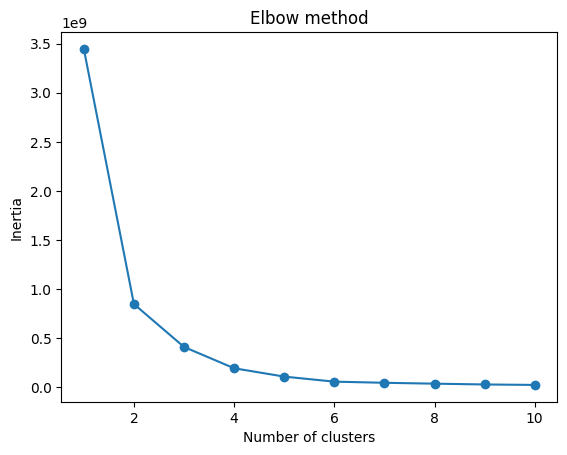

In [331]:
from sklearn.cluster import KMeans
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_sample)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

•	Decide which value of K gives a better explanation of the data and justify your choice. 
- Three appears to be the optimal elbow of the graph. It is the first value right after the large jump between 1 and 2 and appears to classify the data well. Minimizing the error while also reducing overfitting.

C:\Users\liamc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


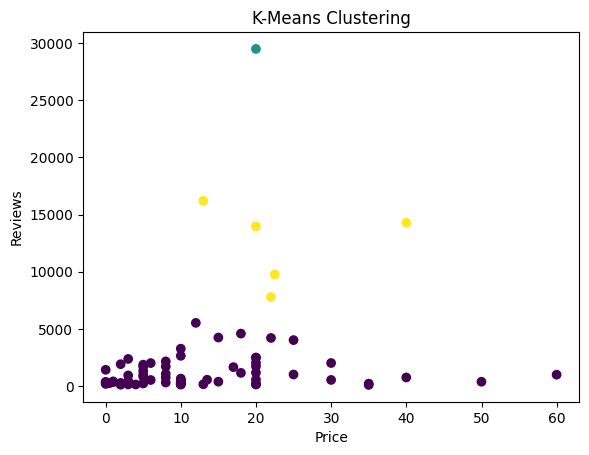

In [332]:
# Fit KMeans with chosen K
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_sample)
cluster_labels = kmeans.labels_

# Visualize clusters (scatter plot)
plt.scatter(data_sample['Price'], data_sample['Reviews'], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Price')
plt.ylabel('Reviews')
plt.show()

### ANSWER:
•	Select the two consecutive values of K that you think best fit the “elbow” of the curve.
- in this small set of data it appears that the elbow is best represented within 2 and 3.

•	Determine the two most important variables that determined the clustering, possibly by examining the mean difference of the variables among the clusters.

- Reviews and Price appear to be the most important variables in order to isolate datapoints that significantly stand out compared to products at a similar price range.


C:\Users\liamc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35937 (\N{CJK UNIFIED IDEOGRAPH-8C61}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\liamc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26827 (\N{CJK UNIFIED IDEOGRAPH-68CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\liamc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\liamc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

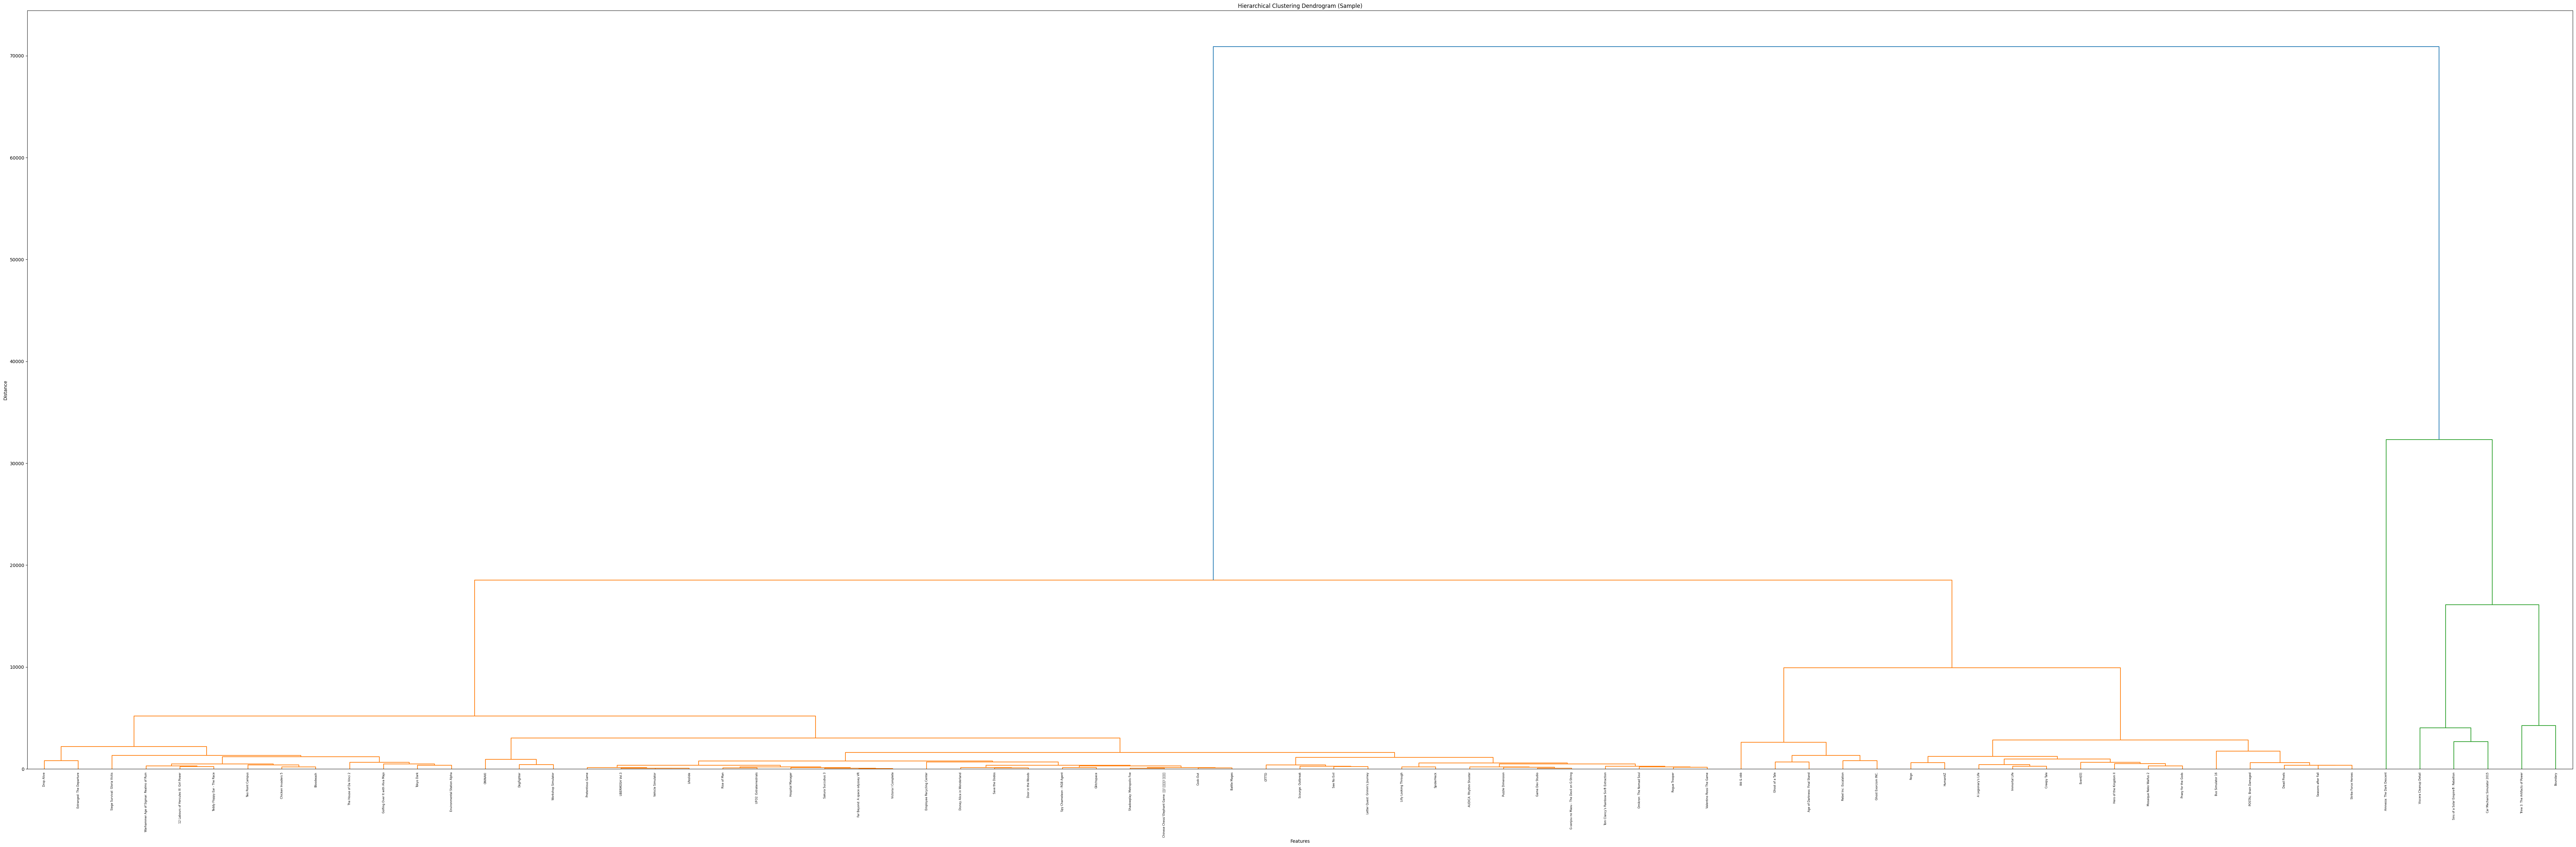

In [333]:
linkage_data = linkage(data_sample, method='ward', metric='euclidean')
plt.rc('axes', unicode_minus=False)
plt.figure(figsize=(100, 30))
dendrogram(linkage_data, labels=names, orientation='top')
plt.title('Hierarchical Clustering Dendrogram (Sample)')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

In [334]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

data.drop("Name", axis=1, inplace=True)

y = data['Reviews'].copy()

data.drop("Reviews", axis=1, inplace=True)
# data.drop("Positive", axis=1, inplace=True)
# data.drop("Negative", axis=1, inplace=True)
X = data.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

r_model = LinearRegression()
r_model.fit(X_train, y_train)

coefficients = r_model.coef_
sorted_indices = coefficients.argsort()[::-1]

top_10_indices = sorted_indices[:10]
top_3_indices = sorted_indices[:3]

top_10_features = X_train.columns[top_10_indices]
print("Top 10 significant features:")
print(top_10_features)

top_3_features = X_train.columns[top_3_indices]
print("Top 3 significant features:")
print(top_3_features)
col3 = ['Positive', 'Negative', 'Mac_flag']
x_train3 = X_train[col3]
X_test3  =  X_test[col3]



col10 = ['Positive', 'Negative', 'Mac_flag', 'Linux_flag', 'Required age',
       'Price', 'Month_cos', 'Average playtime forever', 'Recommendations',
       'Category_Commentary available']

x_train10 = X_train[col10]
X_test10  =  X_test[col10]

r10_model = LinearRegression()
r10_model.fit(x_train10, y_train)

y_pred10 = r10_model.predict(X_test10)

# Calculate metrics (optional)
mse = mean_squared_error(y_test, y_pred10)
mae = mean_absolute_error(y_test, y_pred10)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

r3_model = LinearRegression()
r3_model.fit(x_train3, y_train)

y_pred = r3_model.predict(X_test3)

# Calculate metrics (optional)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")




Top 10 significant features:
Index(['Positive', 'Negative', 'Mac_flag', 'Linux_flag', 'Required age',
       'Price', 'Month_cos', 'Average playtime forever', 'Recommendations',
       'Category_Commentary available'],
      dtype='object')
Top 3 significant features:
Index(['Positive', 'Negative', 'Mac_flag'], dtype='object')
Mean Squared Error: 0.00
Mean Absolute Error: 0.00
Mean Squared Error: 0.00
Mean Absolute Error: 0.00


### ANSWER

- Creating two models based on the top 10 and top 3 coefficients both appear to be overfit with MSE and MAE of 0. I am not sure why they are so overfit since they are both being trained on separate data. When evaluating the cummulative explained variance the 1st variable appears to explain most of the variance. 

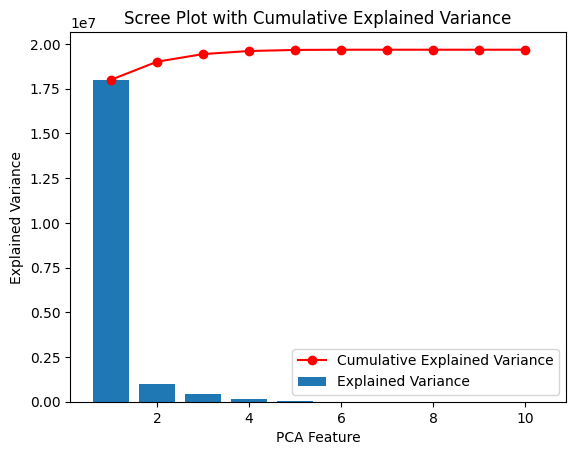

In [335]:
pca = PCA(n_components=10)
pcs = pca.fit_transform(data)
# Plot the explained variance
plt.bar(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, label='Explained Variance')

# Plot the cumulative sum (cumulative explained variance)
plt.plot(range(1, len(pca.explained_variance_) + 1), np.cumsum(pca.explained_variance_), marker='o', color='r', label='Cumulative Explained Variance')

plt.xlabel('PCA Feature')
plt.ylabel('Explained Variance')
plt.title('Scree Plot with Cumulative Explained Variance')
plt.legend()
plt.show()

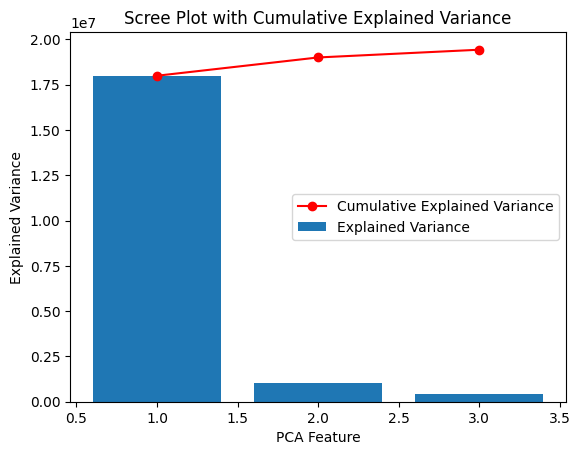

In [336]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(data)
# Plot the explained variance
plt.bar(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, label='Explained Variance')

# Plot the cumulative sum (cumulative explained variance)
plt.plot(range(1, len(pca.explained_variance_) + 1), np.cumsum(pca.explained_variance_), marker='o', color='r', label='Cumulative Explained Variance')

plt.xlabel('PCA Feature')
plt.ylabel('Explained Variance')
plt.title('Scree Plot with Cumulative Explained Variance')
plt.legend()
plt.show()

In [337]:
# Fit PCA on the training data
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

# Transform the test data using the same PCA model
X_test_pca = pca.transform(X_test)

# Train your model (e.g., Linear Regression) using X_train_pca and y_train
reg_model = LinearRegression()
reg_model.fit(X_train_pca, y_train)


y_pred = reg_model.predict(X_test_pca)

# Calculate metrics (optional)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 138.37
Mean Absolute Error: 8.42
